# Fundamentros de Apache Spark: SQL/DataFrames

**Spark SQL trabaja con DataFrames**. Un DataFrame es una **representación relacional de los datos**. Proporciona funciones con capacidades similares a SQL. Además, permite escribir **consultas tipo SQL** para nuestro análisis de datos.

Los DataFrames son similares a las tables relacionales o DataFrames en Python / R, aunque conmucas optimizaciones que se ejecutan de manera "oculta" para el usuario. Hay varias formas de crear DataFrames a partir de colecciopnes, tablas HIVE, ablas relacionales y RDD.

Apache Spark es un motor de análisis unificado de código abierto para el procesamiento de datos a gran escala. Proporciona una interfaz para la programación de clusters completos con paralelismo de datos implícito y tolerancia a fallos. Spark es conocido por su velocidad y facilidad de uso, y soporta múltiples lenguajes de programación como Java, Scala, Python y R. Se utiliza comúnmente para tareas como el procesamiento de datos en tiempo real, el análisis de datos, el aprendizaje automático y la computación gráfica.

In [53]:
import findspark
findspark.init()
import pandas as pd
import pyspark


In [54]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

### Crear la sesión de Spark

In [55]:
spark = SparkSession.builder.getOrCreate() # create a spark session

### Crear el DataFrame

In [56]:
emp = [(1, "AAA", "dept1", 1000),
       (2, "BBB", "dept1", 1100),
       (3, "CCC", "dept1", 3000),
       (4, "DDD", "dept1", 1500),
       (5, "EEE", "dept2", 8000),
       (6, "FFF", "dept2", 7200),
       (7, "GGG", "dept3", 7100),
       (8, "HHH", "dept3", 3700),
       (9, "III", "dept3", 4500),
       (10, "JJJ", "dept5", 3400)]

dept = [("dept1", "Department - 1"),
        ("dept2", "Department - 2"),
        ("dept3", "Department - 3"),
        ("dept4", "Department - 4")]

#ahora se va acrear un df apartir de estas listas
df = spark.createDataFrame(emp, ["id", "name", "dept", "salary"]) #Formato conjunto de datos, y nombr de las columnas

deptdf = spark.createDataFrame(dept, ["id", "name"])

In [57]:
df.show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
|  2| BBB|dept1|  1100|
|  3| CCC|dept1|  3000|
|  4| DDD|dept1|  1500|
|  5| EEE|dept2|  8000|
|  6| FFF|dept2|  7200|
|  7| GGG|dept3|  7100|
|  8| HHH|dept3|  3700|
|  9| III|dept3|  4500|
| 10| JJJ|dept5|  3400|
+---+----+-----+------+



In [58]:
#Crear df a partir de una tabla de Hive
#df = spark.table("tbl_name")

### Operaciones básicas en DataFrames

**count**

In [59]:
df.count() #numero de filas

10

**columns**

In [60]:
df.columns

['id', 'name', 'dept', 'salary']

**dtypes**


Accede al DataType de columnas dentro del DataFrame entrega [(nombre de la columna, tipo)]

In [61]:
df.dtypes

[('id', 'bigint'),
 ('name', 'string'),
 ('dept', 'string'),
 ('salary', 'bigint')]

**schema**

Comprueba como Spark almacena el esquema del DataFrame

In [62]:
df.schema

StructType([StructField('id', LongType(), True), StructField('name', StringType(), True), StructField('dept', StringType(), True), StructField('salary', LongType(), True)])

**printSchema**

In [63]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- dept: string (nullable = true)
 |-- salary: long (nullable = true)



**select**
* Selecciona columnas del DataFrame

In [64]:
df.select("id", "name").show()

+---+----+
| id|name|
+---+----+
|  1| AAA|
|  2| BBB|
|  3| CCC|
|  4| DDD|
|  5| EEE|
|  6| FFF|
|  7| GGG|
|  8| HHH|
|  9| III|
| 10| JJJ|
+---+----+



**filter** 
* Filtrar las filas según alguna condición
* Intentemos encontrar las filas con el id=1
* Hay diferentes formas de especificar la condición

In [65]:
df.filter(df["id"] == 1).show()
df.filter(df.id == 1).show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+



In [66]:
df.filter(col("id") == 1).show()
df.filter("id = 1").show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+



**drop**
* Elimina una columna en particular
**Nota**: No elimina la columna pues la columna e sde naturaleza inmutable crea una copia

In [67]:
newdf = df.drop("id")
newdf.show()

+----+-----+------+
|name| dept|salary|
+----+-----+------+
| AAA|dept1|  1000|
| BBB|dept1|  1100|
| CCC|dept1|  3000|
| DDD|dept1|  1500|
| EEE|dept2|  8000|
| FFF|dept2|  7200|
| GGG|dept3|  7100|
| HHH|dept3|  3700|
| III|dept3|  4500|
| JJJ|dept5|  3400|
+----+-----+------+



**Aggregations**
* Podemos usar la funcion groupBy para agrupar daos y luego usar la funcion "agg" para realizar la greagacion de datos agrupados.

In [68]:
(df.groupBy("dept")
 .agg(count("salary").alias("count"),
      sum("salary").alias("sum"),
      max("salary").alias("max"),
      min("salary").alias("min"),
      avg("salary").alias("avg")
      ).show())

+-----+-----+-----+----+----+------+
| dept|count|  sum| max| min|   avg|
+-----+-----+-----+----+----+------+
|dept1|    4| 6600|3000|1000|1650.0|
|dept2|    2|15200|8000|7200|7600.0|
|dept3|    3|15300|7100|3700|5100.0|
|dept5|    1| 3400|3400|3400|3400.0|
+-----+-----+-----+----+----+------+



**sorting**
* Ordena los datos

In [69]:
df.sort("salary").show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
|  2| BBB|dept1|  1100|
|  4| DDD|dept1|  1500|
|  3| CCC|dept1|  3000|
| 10| JJJ|dept5|  3400|
|  8| HHH|dept3|  3700|
|  9| III|dept3|  4500|
|  7| GGG|dept3|  7100|
|  6| FFF|dept2|  7200|
|  5| EEE|dept2|  8000|
+---+----+-----+------+



In [70]:
df.sort(df.salary.desc()).show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  5| EEE|dept2|  8000|
|  6| FFF|dept2|  7200|
|  7| GGG|dept3|  7100|
|  9| III|dept3|  4500|
|  8| HHH|dept3|  3700|
| 10| JJJ|dept5|  3400|
|  3| CCC|dept1|  3000|
|  4| DDD|dept1|  1500|
|  2| BBB|dept1|  1100|
|  1| AAA|dept1|  1000|
+---+----+-----+------+



**Columnas derivadas**
* Podemos usar la funcion "withColumn" para derivar la columna en funcion de las columnas existentes

In [71]:
df.withColumn("bonus", col("salary") * 0.10).show()

+---+----+-----+------+-----+
| id|name| dept|salary|bonus|
+---+----+-----+------+-----+
|  1| AAA|dept1|  1000|100.0|
|  2| BBB|dept1|  1100|110.0|
|  3| CCC|dept1|  3000|300.0|
|  4| DDD|dept1|  1500|150.0|
|  5| EEE|dept2|  8000|800.0|
|  6| FFF|dept2|  7200|720.0|
|  7| GGG|dept3|  7100|710.0|
|  8| HHH|dept3|  3700|370.0|
|  9| III|dept3|  4500|450.0|
| 10| JJJ|dept5|  3400|340.0|
+---+----+-----+------+-----+



**Joins**
* Podemos realizar varios tipos de combinaciones en múltipless DataFrames
* 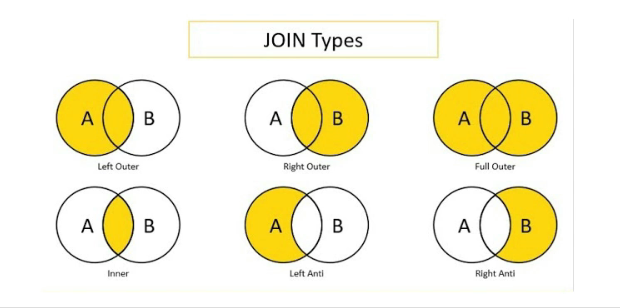

In [72]:
#Inner Join el df1.join(dt2, "columna", "inner")
df.join(deptdf, df.dept == deptdf.id, "inner").show()

+---+----+-----+------+-----+--------------+
| id|name| dept|salary|   id|          name|
+---+----+-----+------+-----+--------------+
|  1| AAA|dept1|  1000|dept1|Department - 1|
|  2| BBB|dept1|  1100|dept1|Department - 1|
|  3| CCC|dept1|  3000|dept1|Department - 1|
|  4| DDD|dept1|  1500|dept1|Department - 1|
|  5| EEE|dept2|  8000|dept2|Department - 2|
|  6| FFF|dept2|  7200|dept2|Department - 2|
|  7| GGG|dept3|  7100|dept3|Department - 3|
|  8| HHH|dept3|  3700|dept3|Department - 3|
|  9| III|dept3|  4500|dept3|Department - 3|
+---+----+-----+------+-----+--------------+



**Letf Outer Join**

In [73]:
df.join(deptdf, df.dept == deptdf.id, "left_outer").show()

+---+----+-----+------+-----+--------------+
| id|name| dept|salary|   id|          name|
+---+----+-----+------+-----+--------------+
|  1| AAA|dept1|  1000|dept1|Department - 1|
|  2| BBB|dept1|  1100|dept1|Department - 1|
|  3| CCC|dept1|  3000|dept1|Department - 1|
|  4| DDD|dept1|  1500|dept1|Department - 1|
|  5| EEE|dept2|  8000|dept2|Department - 2|
|  6| FFF|dept2|  7200|dept2|Department - 2|
|  7| GGG|dept3|  7100|dept3|Department - 3|
|  8| HHH|dept3|  3700|dept3|Department - 3|
| 10| JJJ|dept5|  3400| NULL|          NULL|
|  9| III|dept3|  4500|dept3|Department - 3|
+---+----+-----+------+-----+--------------+



### Consultas SQL
* Ejecucion de consultas tipo SQL
* También podemos realizar analisis de datos escribiendo conusltas similares a SQL. Par realizar consultas similares a SQL, necesitamos registrar el DataFrame como una vista temporal.
* Una vista temporal en Apache Spark es una vista que se crea a partir de un DataFrame y se almacena en la memoria temporalmente. Esta vista puede ser consultada utilizando SQL como si fuera una tabla en una base de datos. Las vistas temporales son útiles para realizar consultas SQL sobre datos que están en un DataFrame sin necesidad de escribir los datos en un almacenamiento persistente.

In [74]:
#Registrar DataFrame en Tabla temporal
df.createOrReplaceTempView("temp_table")

#Ejecutar SQL
spark.sql("select * from temp_table WHERE id=1").show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+



In [75]:
spark.sql("SELECT distinct id from temp_table").show() #distinct elimina duplicados

+---+
| id|
+---+
|  1|
|  3|
|  2|
|  5|
|  4|
|  6|
|  7|
|  8|
|  9|
| 10|
+---+



In [76]:
spark.sql("SELECT * FROM temp_table WHERE salary >= 1500").show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  3| CCC|dept1|  3000|
|  4| DDD|dept1|  1500|
|  5| EEE|dept2|  8000|
|  6| FFF|dept2|  7200|
|  7| GGG|dept3|  7100|
|  8| HHH|dept3|  3700|
|  9| III|dept3|  4500|
| 10| JJJ|dept5|  3400|
+---+----+-----+------+



#### Leyendo la tabla HIVE como DataFrame

In [ ]:
#DB_NAME: name of  the HIVE database 
#TBL_NAME: name of the table in the database

df = spark.table("DB_NAME.TBL_NAME")

AnalysisException: [TABLE_OR_VIEW_NOT_FOUND] The table or view `DB_NAME`.`TBL_NAME` cannot be found. Verify the spelling and correctness of the schema and catalog.
If you did not qualify the name with a schema, verify the current_schema() output, or qualify the name with the correct schema and catalog.
To tolerate the error on drop use DROP VIEW IF EXISTS or DROP TABLE IF EXISTS.;
'UnresolvedRelation [DB_NAME, TBL_NAME], [], false


#### Guardar DataFrame como tabla Hive

In [ ]:
df.write.saveAsTable("DB_NAME.TBL_NAME")

## Tambien podemos seleccionar el argmento "modo" con overwrite, append, ignore, error
df.write.saveAsTable("DB_NAME.TBL_NAME", mode="overwrite")

#De forma predeterminada, la operacion guardara el DataFrame como una tabla interna/ administrada de HIVE
#El modo overwrite, sobreescribira la tabla si ya existe
#El modo append, agregara datos a la tabla
#El modo ignore, no hara nada si la tabla ya existe
#El modo error, lanzara un error si la tabla ya existe

#### Guardar el DataFrame como una tabla externa HIVE

In [ ]:
df.write.saveAsTable("DB_NAME.TBL_NAME", path="path") #saveAsTable guarda el df en una tabla de Hive

#### Crea un DataFrame a partir de un archivo csv

* Podemos crear un DataFrame usando un archivo CSV y podemos especificar vaarias opciones como un separador, encabezado, inferSchema  varias otras opciones

In [ ]:
df = spark.read.csv("path", sep="|", header=True, inferSchema=True) #cargar un archivo csv

#### Guardar un DataFrame como un archivo csv

In [ ]:
df = spark.read.csv("path", sep="|", header=True, mode="overwrite") #cargar un archivo csv

#### Crea un DataFrame a partir de una tabla relacional

* Podemos leer los datos de bases de datos relacionales usando URL JDBC

In [ ]:
#url: jdbc:mysql://hostname:port/dbname por ejemplo jdbc:subprotocol:subname
#TBL_NAME: nombre de la tabla
#USER_NAME: nombre de usuario
#PASSWORD: contraseña

relational_df = spark.read.format("jdbc").option(url=url, dbtable="TBL_NAME", user=USER_NAME, password=PASSWORD).load()

#### Guardar el DataFrame como una tabla relacional

* Podemos gaurdar el DataFrame como una tabla relacional usando URL JDBC

In [ ]:
#url: jdbc:mysql://hostname:port/dbname por ejemplo jdbc:subprotocol:subname
#TBL_NAME: nombre de la tabla
#USER_NAME: nombre de usuario
#PASSWORD: contraseña

relational_df.write.format("jdbc").option(url=url, dbtable="TBL_NAME", user=USER_NAME, password=PASSWORD).mode("overwrite").save()